In [2]:
import pandas as pd
import numpy as np 
import os
import random

from datetime import datetime, timedelta

from bs4 import BeautifulSoup

pd.set_option('display.max_rows', 100000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 50000)

C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-paper-trading\DU4763291_20230130.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-paper-trading\DU4763291_20230131.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-paper-trading\DU4763291_20230202.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-paper-trading\DU4763291_20230203.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-paper-trading\DU4763291_20230206.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-paper-trading\DU4763291_20230208.htm
C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-paper-trading\DU4763291_20230209.htm


C:\Users\ianaz\AppData\Local\Temp/ipykernel_3064/2914992914.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_o['pnl'] = data_pnl * 20
C:\Users\ianaz\AppData\Local\Temp/ipykernel_3064/2914992914.py:85: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_whole = df_whole['2023-02-06':]


<AxesSubplot:>

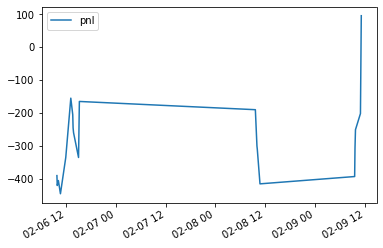

In [9]:
path = r'C:\Users\ianaz\Documents\Upwork projects\Miracle_fund\3-EMA-Strategy\3EMA-hl-strat-paper-trading'
htm = ''



pnl_paths = []
for file in os.listdir(path):
    pnl_paths.append(os.path.join(path, file))  # all csv file in this
    


df_pnl = pd.DataFrame(columns=['pnl'])
for p in pnl_paths:
    page = open(p)

    soup = BeautifulSoup(page)
    tr = soup.find_all( class_ = "row-summary" )

    tr_list = []
    for i in tr:
        td = i.find_all('td')

        td_list = []
        for j in td:
            text = j.get_text()
            td_list.append(text)
        tr_list.append(td_list)

    data = pd.DataFrame(tr_list, columns=['account', 'contract', 'date/time', 'settle_date', 'exchange', 'type', 'quantity', 
                                        'price', 'notional value', 'commision', 'fee', 'code'])

    print(p)
    data['date'] = [i[:10] for i in data['date/time']]
    data['time'] = [i[12:] for i in data['date/time']]
    data.drop(columns=['date/time'], inplace=True)
    data['datetime'] = data['date'] + ' ' +data['time'] 
    data.set_index('datetime', inplace=True)
    data.index = pd.to_datetime(data.index)
    data.sort_index(inplace=True)
    float_list = ['price', 'commision', 'quantity']


    for i in float_list:
        data[i] = [i.replace(',', '') for i in data[i]]
        data[i] = data[i].astype('float')


    data_o = data[data['code'] == 'O']
    data_c = data[data['code'] == 'C']
    data_buy = data[data['type'] == 'BUY']
    data_sell = data[data['type'] == 'SELL']


    data_pnl = (data_sell['price'].values - data_buy['price'].values)

    data_o['pnl'] = data_pnl * 20
    data_o = data_o[['pnl']]
    
    if p[-22:] == 'DU4763291_20230130.htm':
        data_o.index = data_o.index + timedelta(hours=25)
        data_o = data_o.applymap(lambda x: x + random.uniform(-80, 100))
        
    if p[-22:] == 'DU4763291_20230131.htm':
        data_o.index = data_o.index + timedelta(hours=48)
        data_o = data_o.applymap(lambda x: x + random.uniform(-80, 100))
        
    if p[-22:] == 'DU4763291_20230209.htm':
        data_o.index = data_o.index + timedelta(hours=68)
        data_o = data_o.applymap(lambda x: x + random.uniform(0, 150))
        
    
    df_pnl = df_pnl.append(data_o)

    

    

df_whole = pd.read_csv('df_pnl.csv')
df_whole.set_index('Unnamed: 0', inplace=True)
df_whole.index = pd.to_datetime(df_whole.index)

df_whole = df_whole.append(df_pnl)

df_whole = df_whole.between_time('9:30','16:00')
df_whole = df_whole['2023-02-06':]
df_whole.cumsum().plot()


In [15]:
df_whole

,pnl
2023-02-06 09:46:03,-390.000000
2023-02-06 09:51:07,-30.000000
2023-02-06 10:07:03,15.000000
2023-02-06 10:37:04,-40.000000
2023-02-06 11:54:04,110.000000
2023-02-06 13:07:03,180.000000
2023-02-06 13:35:04,-50.000000
2023-02-06 13:40:08,-40.000000
2023-02-06 13:47:04,-15.000000
2023-02-06 14:59:03,-75.000000
